# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#check each city's weather
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
url = f"{base_url}appid={weather_api_key}&units={units}&q="

#set city data
city_data=[]
lat_data=[]
lng_data=[]
max_temp_data = []
humidity_data=[]
cloudiness_data=[]
wind_speed_data=[]
country_data = []
date_data = []
counter =0

for city in cities:
    try:
        response = requests.get(url + city).json()
        city_data.append(response['name'])
        lat_data.append(response['coord']['lat'])
        lng_data.append(response['coord']['lon'])
        max_temp_data.append(response['main']['temp_max'])
        humidity_data.append(response['main']['humidity'])
        cloudiness_data.append(response['clouds']['all'])
        wind_speed_data.append(response['wind']['speed'])
        country_data.append(response['sys']['country'])
        date_data.append(response['dt'])
        print(f'data processed {counter} for {city}')
    except: 
        print('City does not exist, trying next coordinates')
    counter = counter +1

data processed 0 for rikitea
data processed 1 for carutapera
data processed 2 for busselton
data processed 3 for nouadhibou
data processed 4 for banda aceh
data processed 5 for atuona
City does not exist, trying next coordinates
data processed 7 for viedma
data processed 8 for albany
data processed 9 for cidreira
data processed 10 for burnie
data processed 11 for artyom
data processed 12 for hay river
data processed 13 for mar del plata
data processed 14 for mataura
data processed 15 for ushuaia
data processed 16 for georgetown
data processed 17 for dikson
data processed 18 for dustlik
data processed 19 for pandan
data processed 20 for san juan
data processed 21 for luderitz
data processed 22 for bukama
data processed 23 for san roque
data processed 24 for jalu
data processed 25 for hohoe
data processed 26 for vila franca do campo
data processed 27 for progreso
data processed 28 for vaini
data processed 29 for barrow
data processed 30 for hobart
data processed 31 for taoudenni
data pro

data processed 251 for narsaq
data processed 252 for acarau
data processed 253 for grand gaube
City does not exist, trying next coordinates
data processed 255 for ibra
data processed 256 for wakkanai
data processed 257 for natal
data processed 258 for flinders
data processed 259 for blairmore
data processed 260 for waipawa
data processed 261 for laguna
data processed 262 for baoro
data processed 263 for dingle
data processed 264 for mehamn
data processed 265 for seydi
data processed 266 for orlik
data processed 267 for sisimiut
City does not exist, trying next coordinates
data processed 269 for olinda
data processed 270 for bathsheba
data processed 271 for ayagoz
data processed 272 for katsuura
data processed 273 for besuki
data processed 274 for la libertad
data processed 275 for krasnoselkup
data processed 276 for north vanlaiphai
data processed 277 for atbasar
City does not exist, trying next coordinates
data processed 279 for middleton
data processed 280 for kruisfontein
data proce

data processed 499 for wanaka
data processed 500 for alice springs
data processed 501 for waingapu
data processed 502 for portland
data processed 503 for bonito
data processed 504 for teya
data processed 505 for ilulissat
data processed 506 for slave lake
City does not exist, trying next coordinates
data processed 508 for san patricio
data processed 509 for palmer
City does not exist, trying next coordinates
data processed 511 for chornobay
data processed 512 for bagdarin
data processed 513 for lucapa
data processed 514 for college
City does not exist, trying next coordinates
data processed 516 for sovetskiy
data processed 517 for saint pete beach
City does not exist, trying next coordinates
data processed 519 for krasnoborsk
data processed 520 for mount darwin
City does not exist, trying next coordinates
data processed 522 for itarema
data processed 523 for akureyri
data processed 524 for naqadeh
City does not exist, trying next coordinates
data processed 526 for bossangoa
data proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dataframe with the retrived data
weather_df = pd.DataFrame({'City':city_data, 
                           'Lat':lat_data, 
                           'Lng':lng_data,
                           'Max Temp':max_temp_data, 
                           'Humidity':humidity_data,
                           'Cloudiness':cloudiness_data,
                           'Wind Speed':wind_speed_data, 
                           'Country':country_data,
                           'Date':date_data})
len(weather_df.index)
# we had enough cities (500+)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.01,71,0,14.43,PF,1632280834
1,Carutapera,-1.1950,-46.0200,78.10,83,24,7.65,BR,1632280834
2,Busselton,-33.6500,115.3333,78.04,55,0,4.47,AU,1632280834
3,Nouadhibou,20.9310,-17.0347,71.58,83,0,16.11,MR,1632280835
4,Banda Aceh,5.5577,95.3222,83.97,65,100,13.18,ID,1632280835


In [5]:
weather_df.to_csv("output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.loc[weather_df['Humidity']>100]
# there is no city that humidity is greater than 100%. Skipped the step.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

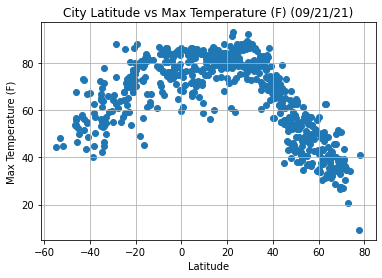

In [9]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],marker='o')
plt.title('City Latitude vs Max Temperature (F) (09/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('images/lat_vs_temp.png')
#observation: temperature tends to be high when location is near the equator while the temperature tends to become lower when location is further from the equator.

## Latitude vs. Humidity Plot

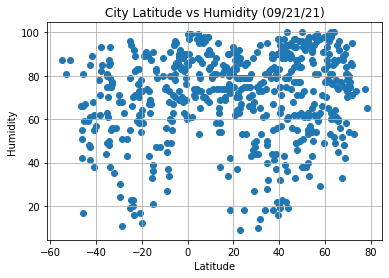

In [10]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker='o')
plt.title('City Latitude vs Humidity (09/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('images/lat_vs_humidity.png')
#observation: There is no corrlation between latitude and humidity. However, there are more cities with humidity over 50% than cities with humidity level below 50%

## Latitude vs. Cloudiness Plot

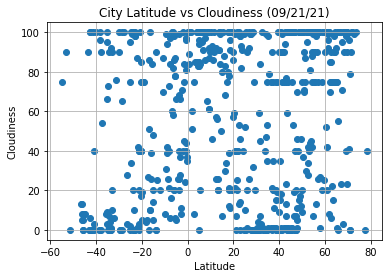

In [11]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker='o')
plt.title('City Latitude vs Cloudiness (09/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('images/lat_vs_cloudiness.png')
#observation: There is no correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

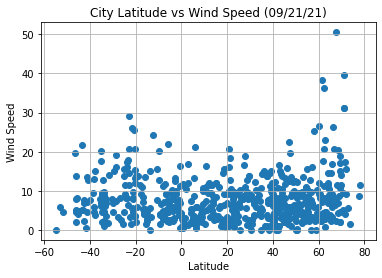

In [12]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker='o')
plt.title('City Latitude vs Wind Speed (09/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('images/lat_vs_windspeed.png')
#observation: There is no correlation between latitude and wind speed.

## Linear Regression

In [13]:
# make sure all latitudes are floats
weather_df['Lat'].dtype
#seperate north and south areas
north = weather_df.loc[weather_df['Lat'] >= 0, :]
south = weather_df.loc[weather_df['Lat'] < 0, :]
# build a linregress function so that it can be applied each time
def linear_regression(x_axis, y_axis, x_label, y_label):
    (slope, intercept, rvalue, _, _) = linregress(x_axis,y_axis)
    print(f'The r-value is: {rvalue}')
    regress_values = x_axis * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values,'r-')
    plt.annotate(line_eq, coord,fontsize=15,color='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8330183106129749


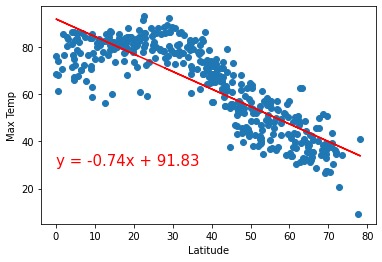

<Figure size 432x288 with 0 Axes>

In [14]:
x_axis = north['Lat']
y_axis = north['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
coord = (0,30)
linear_regression(x_axis, y_axis, x_label,y_label)
plt.savefig('images/lat_vs_temp_nor.png')
#observation: In Northern Hemisphere, max temp decreases when the latitude increases

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7178763021973511


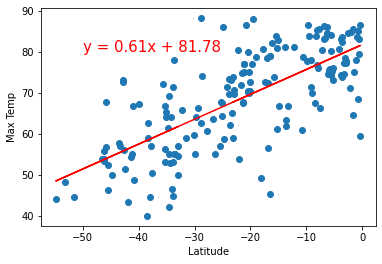

<Figure size 432x288 with 0 Axes>

In [15]:
x_axis = south['Lat']
y_axis = south['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
coord = (-50,80)
linear_regression(x_axis, y_axis, x_label,y_label)
plt.savefig('images/lat_vs_temp_sou.png')
#observation: In Southern Hemisphere, max temp increases when the latitude increases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.05569517728656974


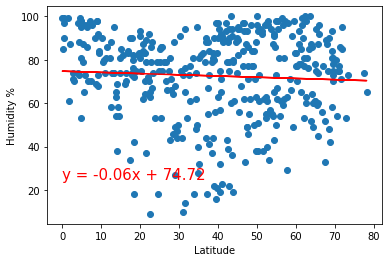

<Figure size 432x288 with 0 Axes>

In [16]:
x_axis = north['Lat']
y_axis = north['Humidity']
x_label = 'Latitude'
y_label = 'Humidity %'
coord = (0,25)
linear_regression(x_axis, y_axis, x_label,y_label)
plt.savefig('images/lat_vs_humidity_nor.png')
#observation: In Northern Hemisphere, latitude and humidity are not correlated.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1955473072481032


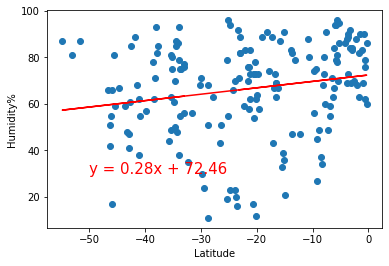

<Figure size 432x288 with 0 Axes>

In [17]:
x_axis = south['Lat']
y_axis = south['Humidity']
x_label = 'Latitude'
y_label = 'Humidity%'
coord = (-50,30)
linear_regression(x_axis, y_axis, x_label,y_label)
plt.savefig('images/lat_vs_temp_sou.png')
#observation: In Southern Hemisphere, latitude and humidity are slightly correlated. hudimidity increases when latitude increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01620210243911539


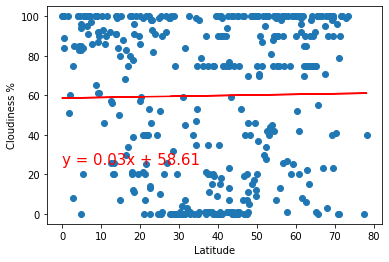

<Figure size 432x288 with 0 Axes>

In [18]:
x_axis = north['Lat']
y_axis = north['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness %'
coord = (0,25)
linear_regression(x_axis, y_axis, x_label,y_label)
plt.savefig('images/lat_vs_cloudiness_nor.png')
#observation: In Northern Hemisphere, latitude and humidity are not correlated.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17861908346660235


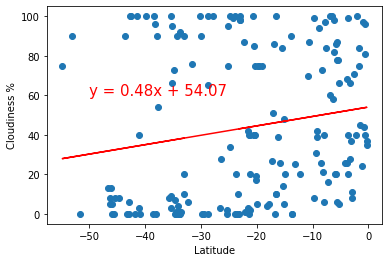

<Figure size 432x288 with 0 Axes>

In [19]:
x_axis = south['Lat']
y_axis = south['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness %'
coord = (-50,60)
linear_regression(x_axis, y_axis, x_label,y_label)
plt.savefig('images/lat_vs_cloudiness_sou.png')
#observation: In Southern Hemisphere, cloudiness increases when the latitude increases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2458026090380949


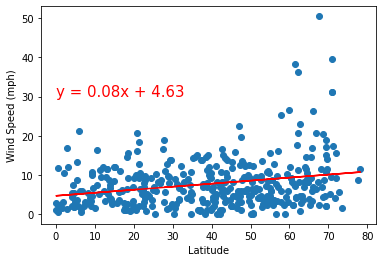

<Figure size 432x288 with 0 Axes>

In [20]:
x_axis = north['Lat']
y_axis = north['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
coord = (0,30)
linear_regression(x_axis, y_axis, x_label,y_label)
plt.savefig('images/lat_vs_windspeed_nor.png')
#observation: In Northern Hemisphere, latitude and wind speed are slightly correlated. Wind speed increases slightly when the latitude increases.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.04307897678894865


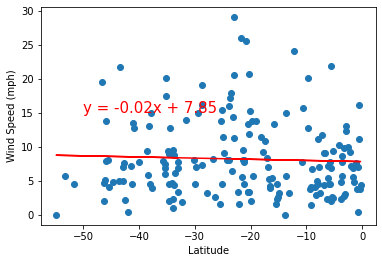

<Figure size 432x288 with 0 Axes>

In [21]:
x_axis = south['Lat']
y_axis = south['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
coord = (-50,15)
linear_regression(x_axis, y_axis, x_label,y_label)
plt.savefig('images/lat_vs_windspeed_sou.png')
#observation: In Southern Hemisphere, latitude and wind speed are not correlated.